# Regrid Fitted Leica Scan
Here we demonstrate our efforts, some succesfful, others not, of regridding the fitted Leica scan data so that it is evenly spaced in x and y, as it needs to be before we both compare different scans and then fit zernike coefficients.


In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


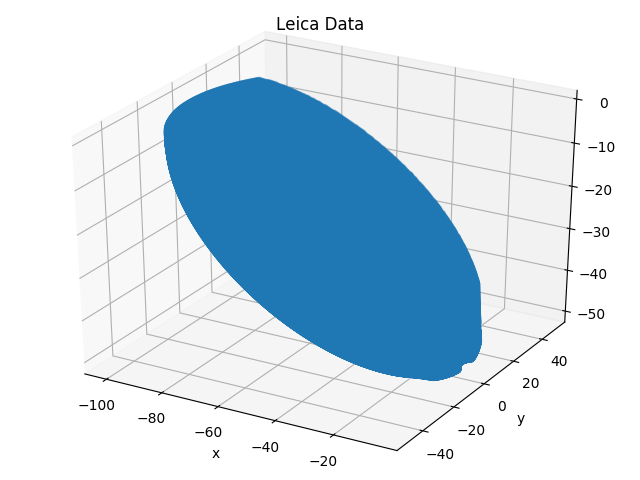

cleaned data fitted with coefficients:  [ 5.74103825e+01  2.83550388e-01 -2.22811412e+00 -4.91790420e+01
  1.52444697e-03 -3.31407039e-02]


<IPython.core.display.Javascript object>


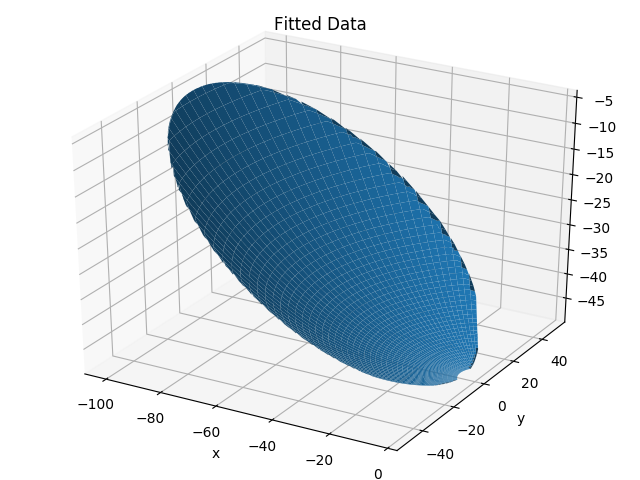

<IPython.core.display.Javascript object>


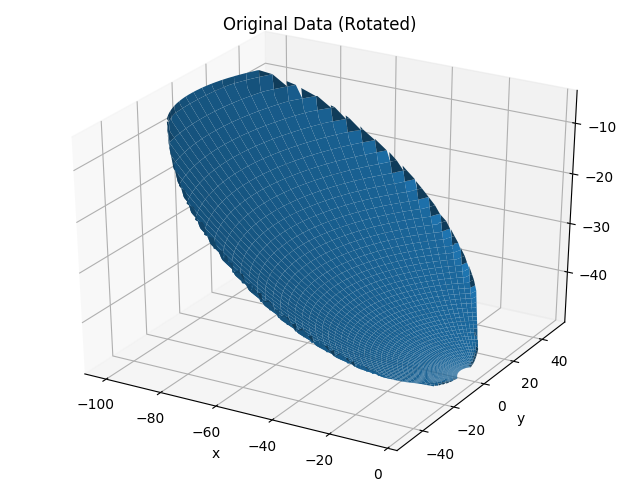

<IPython.core.display.Javascript object>


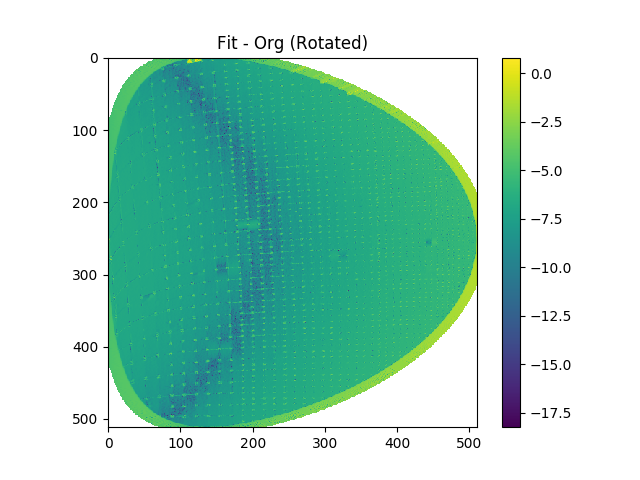

In [3]:
# import our helper functions
from parabolas import *

# load in a reference scan that has already been smoothed
fn = "data/Baseline_STA10_HIGH_METERS.csv.smoothed.sig.001.all.npz"

# and fit this data to a rotated parabola
refDiff, refX, refY = fitLeicaScan(fn)

## Try to regrid the data using scipy
Notice that our image above does not look like the dish.  That's because it's evenly sampled in spherical coordinates, but NOT in x and y.  So we'll try using scipy to regrid it to be evenly sampled in x and y.
However:
   * we haven't quite figured out how to deal with edge effects (the NaN's that are blank above)
   * scipy will give memory errors or even hang if you give it too much data.

So, we'll try just regridding a small section of the interior of this data.   

In [4]:
from copy import copy
start = 250
end = 350
refX2 = copy(refX[start:end, start:end])
refY2 = copy(refY[start:end, start:end])
refDiff2 = copy(refDiff[start:end, start:end])

In [5]:
# import our wrapper for scipy.interpolate.interp2d
from main import interpXYZ
refX3, refY3, refDiff3 = interpXYZ(refX2, refY2, refDiff2, 100, checkLevels=True)

Removed 0 NaNs from 10000 data points
Replacing values greater then original with NaNs
Replacing values less then original with NaNs


/data/sandboxes/pmargani/lassi-analysis/pmargani_lassi_env/lib/python2.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=65,69 m=10000 fp=0.425002 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
main.py:226: RuntimeWarning: invalid value encountered in less
  lstMin = znew < np.nanmin(z)/2.


<IPython.core.display.Javascript object>


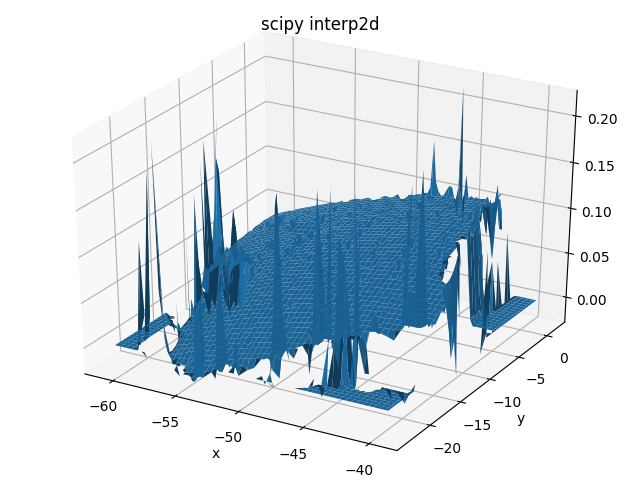

In [6]:
surface3dPlot(refX3, refY3, refDiff3, "scipy interp2d")

<IPython.core.display.Javascript object>


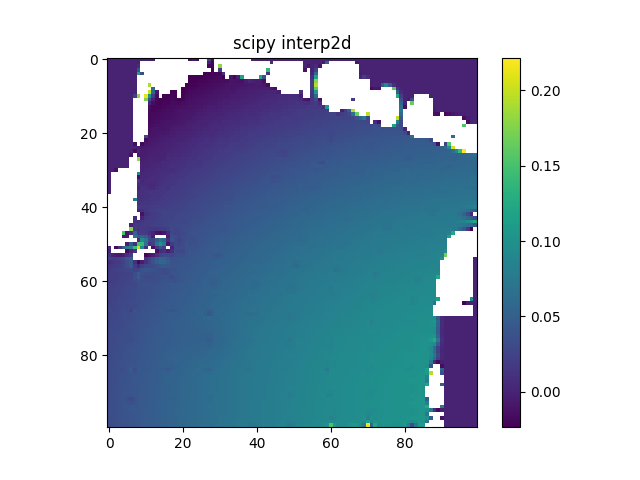

In [8]:
imagePlot(refDiff3, "scipy interp2d")

## Try to regrid the data using our in-house smoothing technique
Well, the scipy results frankly suck.  Now, the smoothing we do in the beginning of our
pipeline also regrids.  So, we changed this so that it would work in cartesian instead of spherical coordinates, and it actually produces sensible, regridded results.

Runnig this smoothing at the full resolution (512x512) takes about 20 minutes, so we won't do it here

<IPython.core.display.Javascript object>


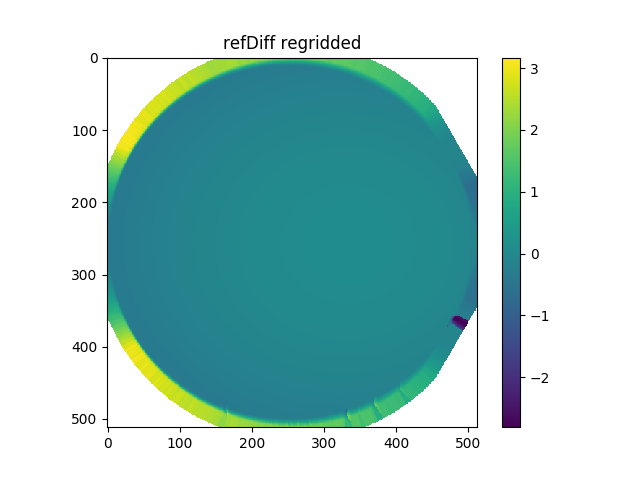

In [9]:
# regrid the data using our in house smoothing technique
# refXs, refYs, refDiffs = smoothXYZDask(refX, refY, refDiff, 512, sigX=0.1, sigY=0.1)

# instead, let's view the results of this smoothing
refDiffSmoothed = np.load("refDiffsSmoothed.npy")
imagePlot(refDiffSmoothed, "refDiff regridded")

The above data is what we want, but visually it doesn't tell us much.  Instead if we smooth the log of the difference (log(abs(diff(refDiff)))), we get a much more interesting and familiar image.
![refDiffLog](refDiffLogRegridded512.png)